In [23]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt

In [4]:
dataset_url = pd.read_excel('Clean Data Ver 6.xlsx')

In [5]:
df = dataset_url.copy()

In [6]:
df.shape

(19473, 7)

In [7]:
df.head()

,age_range,industry,current_exp_range,degree,gender,total_income,degree_with/out
0,25-34,Education (Higher Education),5-7 years,Master's degree,Woman,55000,With Degree
1,25-34,Nonprofits,5-7 years,College degree,Woman,65000,With Degree
2,25-34,"Accounting, Banking & Finance",5-7 years,College degree,Woman,67000,With Degree
3,25-34,Education (Higher Education),2 - 4 years,Master's degree,Man,62000,With Degree
4,25-34,Education (Primary/Secondary),5-7 years,Master's degree,Man,50000,With Degree


In [8]:
df.dtypes

age_range            object
industry             object
current_exp_range    object
degree               object
gender               object
total_income          int64
degree_with/out      object
dtype: object

In [9]:
df.describe()

,total_income
count,19473.000000
mean,94925.470857
std,39219.286151
min,45000.000000
25%,64341.000000
50%,85000.000000
75%,117000.000000
max,217200.000000


# Terdapat 13 Industry yang memiliki total income masih di bawah rata-rata dan hanya 12 Industry yang memi;iki total_income di atas rata=rata. Industry Social Work berada pada urutan pertama pada industry dengan rata-rata total income terendah yaitu sebesar $64705 USD

In [107]:
industry_avg_income = round(df.groupby('industry')['total_income'].mean())

# Menghitung rata-rata keseluruhan dari rata-rata pendapatan industri
overall_avg_income = round(industry_avg_income.mean())

print("Rata-rata keseluruhan pendapatan industri: ", overall_avg_income)

# Menentukan industri yang memiliki pendapatan di bawah dan di atas rata-rata keseluruhan
below_avg_industries = industry_avg_income[industry_avg_income < overall_avg_income]
above_avg_industries = industry_avg_income[industry_avg_income > overall_avg_income]

Rata-rata keseluruhan pendapatan industri:  90683


In [63]:
sorted_below_avg_industries = below_avg_industries.sort_values(ascending= True).rename_axis('Industry Bawah Avg')
sorted_below_avg_industries = sorted_below_avg_industries.reset_index(name='Avg Income')
sorted_below_avg_industries

,Industry Bawah Avg,Avg Income
0,Social Work,64705.0
1,Education (Primary/Secondary),70339.0
2,Education (Higher Education),74656.0
3,Nonprofits,78739.0
4,Art & Design,81366.0
5,Hospitality & Events,82244.0
6,Retail,83613.0
7,Property or Construction,84079.0
8,Agriculture or Forestry,85395.0
9,Recruitment or HR,87548.0


In [21]:
jml_industries_under_avg  = sorted_below_avg_industries['Industry Bawah Avg'].count()
print('Jumlah Industry Under Avg total =', jml_industries_under_avg)

Jumlah Industry Under Avg total = 13


<Figure size 1600x600 with 0 Axes>

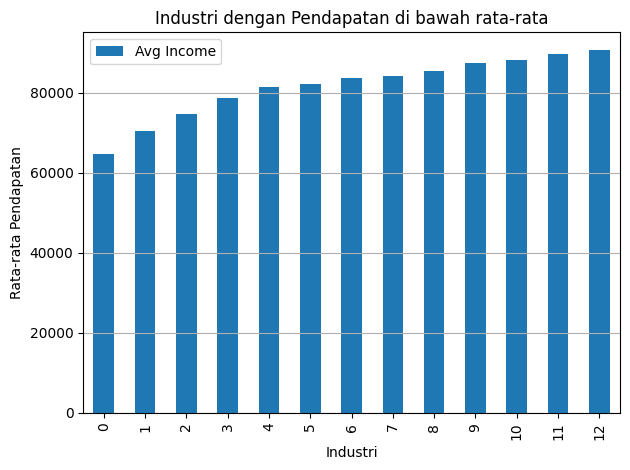

In [29]:
# Buat bar chart
plt.figure(figsize=(16, 6))
sorted_below_avg_industries.plot(kind='bar')
plt.xlabel('Industri')
plt.ylabel('Rata-rata Pendapatan')
plt.title('Industri dengan Pendapatan di bawah rata-rata')
plt.xticks(rotation=90)  # Rotasi label sumbu x agar lebih mudah dibaca
plt.grid(axis='y')
plt.tight_layout()
plt.show()

In [36]:
sorted_above_avg_industries = above_avg_industries.sort_values(ascending = True).rename_axis('Industry Atas Avg')
sorted_above_avg_industries = sorted_above_avg_industries.reset_index(name='Avg Income')
sorted_above_avg_industries

,Industry Atas Avg,Avg Income
0,Media & Digital,90747.0
1,Health care,94132.0
2,"Marketing, Advertising & PR",94619.0
3,Insurance,95597.0
4,"Accounting, Banking & Finance",96133.0
5,Entertainment,97582.0
6,Sales,97604.0
7,Utilities & Telecommunications,100820.0
8,Engineering or Manufacturing,103426.0
9,Law,103890.0


In [37]:
jml_industris_above_avg = sorted_above_avg_industries['Industry Atas Avg'].count()
print('Jumlah Industry Above Avg total =', jml_industris_above_avg)

Jumlah Industry Above Avg total = 12


<Figure size 1600x600 with 0 Axes>

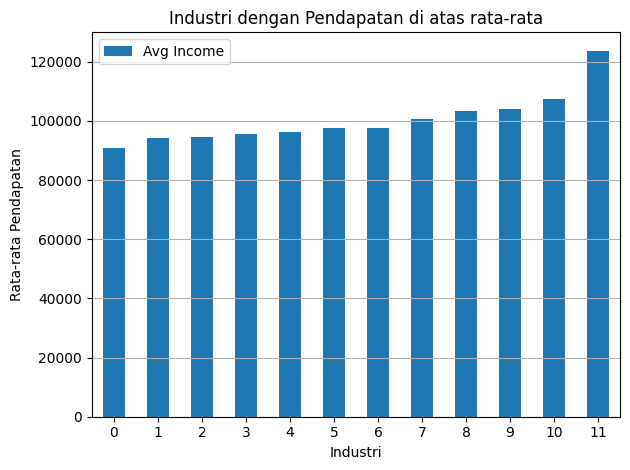

In [39]:
# Buat bar chart
plt.figure(figsize=(16, 6))
sorted_above_avg_industries.plot(kind='bar')
plt.xlabel('Industri')
plt.ylabel('Rata-rata Pendapatan')
plt.title('Industri dengan Pendapatan di atas rata-rata')
plt.xticks(rotation=0)  # Rotasi label sumbu x agar lebih mudah dibaca
plt.grid(axis='y')
plt.tight_layout()
plt.show()

# Ssbagian besar responden di atas 18 tahun memiliki gelar sarjana s1. Hanya responden yang berusia di atas 65 tahun yang sebagian respondennya memiliki gelar s2

In [40]:
modus_degree_per_age_range = df.groupby('age_range')['degree'].apply(lambda row: row.mode()[0]).to_frame('Modus Degree')

# modus_per_age_range
# modus_degree_per_age_range = df.groupby('age_range')['degree'].agg(lambda row: pd.Series.mode(row).iloc[0]).to_frame('Modus Degree')
modus_degree_per_age_range['Jumlah Modus'] = df.groupby('age_range')['degree'].apply(lambda row: (row == row.mode()[0]).sum())

modus_degree_per_age_range

,Modus Degree,Jumlah Modus
age_range,,
18-24,College degree,535
25-34,College degree,4716
35-44,College degree,2862
45-54,College degree,953
55-64,College degree,312
65+,Master's degree,31


In [41]:
df['age_range'].value_counts()

age_range
25-34    8651
35-44    7084
45-54    2298
55-64     724
18-24     644
65+        72
Name: count, dtype: int64

In [42]:
respondents_per_age_range = df['age_range'].value_counts().reset_index(name= 'Jumlah Responden')
respondents_per_age_range = respondents_per_age_range.rename(columns={'index': 'age_range'})
respondents_per_age_range.sort_values(by = 'age_range', ascending= True)

,age_range,Jumlah Responden
4,18-24,644
0,25-34,8651
1,35-44,7084
2,45-54,2298
3,55-64,724
5,65+,72


In [43]:
sum_modus = df.groupby('age_range')['degree'].apply(lambda row: (row == row.mode()[0]).sum())
total_responden_per_age_range = df['age_range'].value_counts()

# sum_modus.dtype
# total_responden_per_age_range.dtypes

persentase_modus_per_age_range = round((sum_modus / total_responden_per_age_range) * 100)

result = pd.DataFrame({'Jumlah Modus Degree': sum_modus, 'Total Responden': total_responden_per_age_range, 'Persentase Modus': persentase_modus_per_age_range})

result

,Jumlah Modus Degree,Total Responden,Persentase Modus
age_range,,,
18-24,535,644,83.0
25-34,4716,8651,55.0
35-44,2862,7084,40.0
45-54,953,2298,41.0
55-64,312,724,43.0
65+,31,72,43.0


In [44]:
filtered_data = df.loc[df['age_range'] == '0-17']

degree = filtered_data['degree']
pd.DataFrame({"Umur": filtered_data['age_range'], 'Degree': degree})

,Umur,Degree


# Perempuan memliki total pendapatan lebih rendah dari laki-laki yaitu dengan selisih $19782 USD dengan persentase total incme laki-laki 71% lebih tinggi dari perempuan walaupun persentase jumlah responden perempuan jauh lebih tinggi 3 kali lipat dari laki-laki

In [45]:
avg_income_menurut_gender = round(df.groupby('gender')['total_income'].mean())
avg_income_menurut_gender.sort_values()

gender
Other Gender     90890.0
Woman            91437.0
Man             111219.0
Name: total_income, dtype: float64

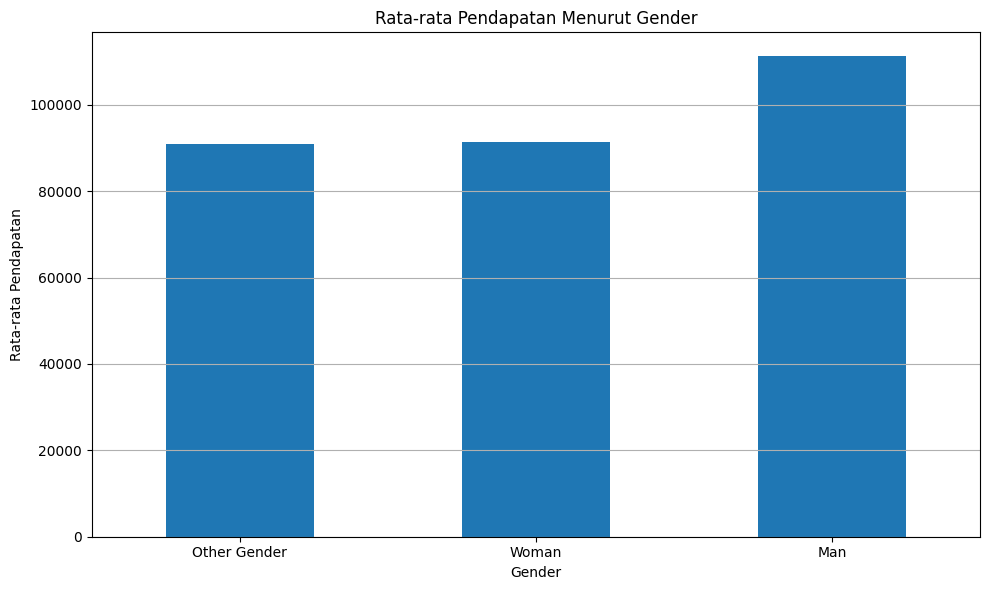

In [47]:
# Buat bar chart
plt.figure(figsize=(10, 6))
avg_income_menurut_gender.sort_values().plot(kind='bar')
plt.xlabel('Gender')
plt.ylabel('Rata-rata Pendapatan')
plt.title('Rata-rata Pendapatan Menurut Gender')
plt.xticks(rotation=0)  # Rotasi label sumbu x agar lebih mudah dibaca
plt.grid(axis='y')
plt.tight_layout()
plt.show()

In [48]:
selisish_income_man_woman = avg_income_menurut_gender.loc['Man'] - avg_income_menurut_gender.loc['Woman']
selisish_income_man_woman

19782.0

In [49]:
persentase_selisih_income = round((selisish_income_man_woman / avg_income_menurut_gender.loc['Woman']) * 100)
persentase_selisih_income

22

In [50]:
# jml gender
jml_gender = df['gender'].value_counts()
jml_gender

gender
Woman           15307
Man              3454
Other Gender      712
Name: count, dtype: int64

In [51]:
selisih_gender_woman_man = jml_gender.loc['Woman'] - jml_gender.loc['Man']
selisih_gender_woman_man

11853

In [52]:
persentase_selisih_man_woman = round((selisih_gender_woman_man / jml_gender.loc['Man'])*100)
persentase_selisih_man_woman

343

In [53]:
rata_rata_pendapatan = round(df['total_income'].mean())
rata_rata_pendapatan

94925

# Hubungan Umur dan Gaji

In [59]:
umur_gaji = round(df.groupby('age_range')["total_income"].mean())
umur_gaji.sort_values(ascending = True)

age_range
18-24     76069.0
25-34     89821.0
55-64     98848.0
35-44    100008.0
45-54    102229.0
65+      104211.0
Name: total_income, dtype: float64

# Hubungan Edu Gaji

In [61]:
edu_gaji = round(df.groupby('degree')['total_income'].mean())
edu_gaji.sort_values(ascending = True)

degree
Some college            87982.0
High School             90086.0
College degree          92880.0
Other Degree            93658.0
Master's degree         94712.0
PhD                    106857.0
Professional degree    115179.0
Name: total_income, dtype: float64

In [73]:
edu_gaji_2parans = round(df.groupby('degree_with/out')['total_income'].mean())
edu_gaji_2parans.sort_values(ascending = True)

degree_with/out
Without Degree    88760.0
With Degree       95459.0
Name: total_income, dtype: float64

# Hubungan Degree dan Industry

In [62]:
modus_degree_industry = df.groupby('degree')['industry'].apply(lambda row: row.mode()[0]).to_frame('Modus Industry')
modus_degree_industry['Jumlah Modus'] = df.groupby('degree')['industry'].apply(lambda row: (row == row.mode()[0]).sum())

modus_degree_industry

,Modus Industry,Jumlah Modus
degree,,
College degree,Computing or Tech,1885
High School,Computing or Tech,62
Master's degree,Education (Higher Education),878
Other Degree,Computing or Tech,17
PhD,Education (Higher Education),385
Professional degree,Law,428
Some college,Computing or Tech,283


In [66]:
respondents_per_degree = df['degree'].value_counts().reset_index(name= 'Jumlah Responden')
respondents_per_degree = respondents_per_degree.rename(columns={'index': 'Degree'})
respondents_per_degree

,degree,Jumlah Responden
0,College degree,9402
1,Master's degree,6611
2,Some college,1175
3,PhD,1013
4,Professional degree,895
5,High School,261
6,Other Degree,116


In [68]:
sum_modus_industry = df.groupby('degree')['industry'].apply(lambda row: (row == row.mode()[0]).sum())
respondents_per_degree = df['degree'].value_counts()

persentase_modus_per_degree = round((sum_modus_industry / respondents_per_degree) * 100)

result = pd.DataFrame({'Jumlah Modus Industry': sum_modus_industry, 'Total Responden Degree': respondents_per_degree, 'Persentase Modus': persentase_modus_per_degree})

result

,Jumlah Modus Industry,Total Responden Degree,Persentase Modus
degree,,,
College degree,1885,9402,20.0
High School,62,261,24.0
Master's degree,878,6611,13.0
Other Degree,17,116,15.0
PhD,385,1013,38.0
Professional degree,428,895,48.0
Some college,283,1175,24.0


# Hubungan Industry dan Degree Dominan

In [69]:
modus_degree_indutry_degree = df.groupby('industry')['degree'].apply(lambda row: row.mode()[0]).to_frame('Modus Degree')
modus_degree_indutry_degree['Jumlah Modus'] = df.groupby('industry')['degree'].apply(lambda row: (row == row.mode()[0]).sum())

modus_degree_indutry_degree

,Modus Degree,Jumlah Modus
industry,,
"Accounting, Banking & Finance",College degree,721
Agriculture or Forestry,College degree,49
Art & Design,College degree,176
Business or Consulting,College degree,316
Computing or Tech,College degree,1885
Education (Higher Education),Master's degree,878
Education (Primary/Secondary),Master's degree,374
Engineering or Manufacturing,College degree,767
Entertainment,College degree,101


In [72]:
sum_modus_industry_degree = df.groupby('industry')['degree'].apply(lambda row: (row == row.mode()[0]).sum())
respondents_per_industry = df['industry'].value_counts()

persentase_modus_per_industry = round((sum_modus_industry_degree / respondents_per_industry) * 100)

result = pd.DataFrame({'Jumlah Modus Degree': sum_modus_industry_degree, 'Total Responden Industry': respondents_per_industry, 'Persentase Modus': persentase_modus_per_industry})

result

,Jumlah Modus Degree,Total Responden Industry,Persentase Modus
industry,,,
"Accounting, Banking & Finance",721,1256,57.0
Agriculture or Forestry,49,84,58.0
Art & Design,176,252,70.0
Business or Consulting,316,626,50.0
Computing or Tech,1885,3110,61.0
Education (Higher Education),878,1737,51.0
Education (Primary/Secondary),374,570,66.0
Engineering or Manufacturing,767,1340,57.0
Entertainment,101,155,65.0


In [109]:
industry_avg_income.reset_index()

,industry,total_income
0,"Accounting, Banking & Finance",96133.0
1,Agriculture or Forestry,85395.0
2,Art & Design,81366.0
3,Business or Consulting,107574.0
4,Computing or Tech,123785.0
5,Education (Higher Education),74656.0
6,Education (Primary/Secondary),70339.0
7,Engineering or Manufacturing,103426.0
8,Entertainment,97582.0
9,Government and Public Administration,89666.0


In [121]:
industry_avg_income = round(df.groupby('industry')['total_income'].mean())

mode_degree_per_industry = df.groupby('industry')['degree'].apply(lambda row: row.mode()[0])

respondents_per_industry = df['industry'].value_counts()

sum_modus_industry_degree = df.groupby('industry')['degree'].apply(lambda row: (row == row.mode()[0]).sum())
persentase_modus_per_industry = round((sum_modus_industry_degree / respondents_per_industry) * 100)
avg_income_degree_per_industry = [round(df.loc[(df['industry'] == industry) & (df['degree'] == mode_degree_per_industry[industry]), 'total_income'].mean()) for industry in mode_degree_per_industry.index]

result = pd.DataFrame({
    'Modus Degree': mode_degree_per_industry,
    'Rata-rata Pendapatan (Modus)': avg_income_degree_per_industry,
    'Rata-rata Pendapatan (Industri)': industry_avg_income,
    'Jumlah Modus Degree': sum_modus_industry_degree,
    'Total Responden Industry': respondents_per_industry,
    'Persentase Modus': persentase_modus_per_industry
})
result = result.sort_values(by='Modus Degree')
result

,Modus Degree,Rata-rata Pendapatan (Modus),Rata-rata Pendapatan (Industri),Jumlah Modus Degree,Total Responden Industry,Persentase Modus
industry,,,,,,
"Accounting, Banking & Finance",College degree,91605,96133.0,721,1256,57.0
Sales,College degree,95095,97604.0,122,192,64.0
Retail,College degree,83984,83613.0,153,242,63.0
Recruitment or HR,College degree,84936,87548.0,227,358,63.0
Property or Construction,College degree,84745,84079.0,146,256,57.0
Other Industry,College degree,84010,88237.0,728,1589,46.0
Nonprofits,College degree,74551,78739.0,822,1789,46.0
Media & Digital,College degree,88579,90747.0,362,537,67.0
"Marketing, Advertising & PR",College degree,93142,94619.0,598,839,71.0


## Ngecek yg degree dominan di tiap industry yang di atas rata" and di bawah rata"

In [129]:
# Hitung rata-rata pendapatan modus degree per industri
avg_income_degree_per_industry = [round(df.loc[(df['industry'] == industry) & (df['degree'] == mode_degree_per_industry[industry]), 'total_income'].mean()) for industry in mode_degree_per_industry.index]

# Ubah hasil perhitungan menjadi Pandas Series
avg_income_degree_series = pd.Series(avg_income_degree_per_industry, index=mode_degree_per_industry.index)

# Bandingkan dengan rata-rata pendapatan keseluruhan per industri
below_avg_income_industries = avg_income_degree_series[avg_income_degree_series < industry_avg_income]
above_avg_income_industries = avg_income_degree_series[avg_income_degree_series > industry_avg_income]

In [136]:
below_avg_income_industries.reset_index()

,industry,0
0,"Accounting, Banking & Finance",91605
1,Agriculture or Forestry,81770
2,Business or Consulting,99966
3,Computing or Tech,120739
4,Education (Higher Education),71362
5,Engineering or Manufacturing,97107
6,Entertainment,93227
7,Health care,83425
8,Hospitality & Events,81325
9,Insurance,93079


In [138]:
print('Jumlah di bawah rata-rata', below_avg_income_industries.count())

Jumlah di bawah rata-rata 17


In [132]:
above_avg_income_industries.reset_index()

,industry,0
0,Art & Design,81926
1,Education (Primary/Secondary),73660
2,Government and Public Administration,90774
3,Law,116600
4,Property or Construction,84745
5,Retail,83984
6,Social Work,66270
7,Transport or Logistics,92516


In [139]:
print('Jumlah di atas rata-rata', above_avg_income_industries.count())

Jumlah di atas rata-rata 8


# Hubungan Gender, Degree, dan Gaji

In [80]:
gender_degree_income = round(df.groupby(['gender', 'degree'])['total_income'].mean().reset_index())
gender_degree_income.sort_values(by = 'total_income', ascending = True)

,gender,degree,total_income
15,Woman,High School,77808.0
20,Woman,Some college,80529.0
10,Other Gender,Other Degree,87562.0
9,Other Gender,Master's degree,88392.0
13,Other Gender,Some college,88517.0
14,Woman,College degree,89022.0
7,Other Gender,College degree,90467.0
16,Woman,Master's degree,91708.0
17,Woman,Other Degree,92022.0
8,Other Gender,High School,97989.0


In [83]:
gender_degree_income = round(df.groupby(['gender', 'degree'])['total_income'].mean().reset_index())
gender_degree_income = gender_degree_income[(gender_degree_income['gender'] == 'Man') | (gender_degree_income['gender'] == 'Woman')]

gender_degree_income.sort_values(by='total_income', ascending=True)

,gender,degree,total_income
15,Woman,High School,77808.0
20,Woman,Some college,80529.0
14,Woman,College degree,89022.0
16,Woman,Master's degree,91708.0
17,Woman,Other Degree,92022.0
18,Woman,PhD,103406.0
1,Man,High School,104679.0
6,Man,Some college,105304.0
3,Man,Other Degree,108266.0
0,Man,College degree,108960.0


In [163]:
pivot_table = round(df.pivot_table(index='gender', columns='degree', values='total_income', aggfunc='mean').reset_index())
gender_degree_income = pivot_table[(pivot_table['gender'] == 'Man') | (pivot_table['gender'] == 'Woman')]

gender_degree_income
# Sort values by total_income
# gender_degree_income = gender_degree_income.sort_values(by='total_income', ascending=True)

degree,gender,College degree,High School,Master's degree,Other Degree,PhD,Professional degree,Some college
0,Man,108960.0,104679.0,113978.0,108266.0,128077.0,126889.0,105304.0
2,Woman,89022.0,77808.0,91708.0,92022.0,103406.0,113681.0,80529.0


In [97]:
df['gender'].value_counts()

gender
Woman           15307
Man              3454
Other Gender      712
Name: count, dtype: int64

In [165]:
pivot_table = round(df.pivot_table(index='degree', columns='gender', values='total_income', aggfunc='mean').reset_index())

# selisih rata-rata income
pivot_table['Selisih Rata" Income'] = pivot_table["Man"] - pivot_table["Woman"]

result = pivot_table[['degree', 'Selisih Rata" Income']]
result.sort_values(by = 'Selisih Rata" Income', ascending = True)

gender,degree,"Selisih Rata"" Income"
5,Professional degree,13208.0
3,Other Degree,16244.0
0,College degree,19938.0
2,Master's degree,22270.0
4,PhD,24671.0
6,Some college,24775.0
1,High School,26871.0


In [161]:
avg_income_diff = pivot_table['Selisih Rata" Income'].mean()
print('Selisih rata-rata pendapatan di tiap degreenya antara man dan woman', round(avg_income_diff))

Selisih rata-rata pendapatan di tiap degreenya antara man dan woman 21140


# Hubungan Gender, Industry, dan Gaji

In [192]:
# pivot_table = round(df.pivot_table(index='gender', columns='industry', values='total_income', aggfunc='mean').reset_index())
# gender_industry_income = pivot_table[(pivot_table['gender'] == 'Man') | (pivot_table['gender'] == 'Woman')]

# gender_industry_income

pivot_table = round(df.pivot_table(index='industry', columns='gender', values='total_income', aggfunc='mean', margins=True).reset_index())
gender_industry_income = pivot_table[(pivot_table['industry'] != 'All')]

gender_industry_income

gender,industry,Man,Other Gender,Woman,All
0,"Accounting, Banking & Finance",109283.0,106714.0,93234.0,96133.0
1,Agriculture or Forestry,83316.0,74261.0,86414.0,85395.0
2,Art & Design,85317.0,79852.0,80758.0,81366.0
3,Business or Consulting,117233.0,104192.0,105834.0,107574.0
4,Computing or Tech,132719.0,119796.0,118262.0,123785.0
5,Education (Higher Education),84781.0,68193.0,73602.0,74656.0
6,Education (Primary/Secondary),70088.0,63272.0,70628.0,70339.0
7,Engineering or Manufacturing,107664.0,96310.0,102151.0,103426.0
8,Entertainment,120263.0,104338.0,92903.0,97582.0
9,Government and Public Administration,100088.0,84320.0,88205.0,89666.0


In [191]:
pivot_table = round(df.pivot_table(index='industry', columns='gender', values='total_income', aggfunc='mean').reset_index())

# Hitung selisih rata-rata income
pivot_table['Selisih Rata Income'] = pivot_table["Man"] - pivot_table["Woman"]

# Buat DataFrame baru
result = pivot_table[['industry', 'Selisih Rata Income']]

result.sort_values(by='Selisih Rata Income', ascending=True)

gender,industry,Selisih Rata Income
20,Retail,-10823.0
1,Agriculture or Forestry,-3098.0
6,Education (Primary/Secondary),-540.0
2,Art & Design,4559.0
22,Social Work,4593.0
19,Recruitment or HR,4913.0
7,Engineering or Manufacturing,5513.0
17,Other Industry,6248.0
10,Health care,6696.0
11,Hospitality & Events,6891.0


In [169]:
avg_income_industry_diff = pivot_table['Selisih Rata Income'].mean()
print('Selisih rata-rata pendapatan di tiap industrynya antara man dan woman', round(avg_income_industry_diff))

Selisih rata-rata pendapatan di tiap industrynya antara man dan woman 9452


# Hubungan Gender, EXperience, Gaji

In [171]:
pivot_table = round(df.pivot_table(index='gender', columns='current_exp_range', values='total_income', aggfunc='mean').reset_index())
gender_exp_income = pivot_table[(pivot_table['gender'] == 'Man') | (pivot_table['gender'] == 'Woman')]

gender_exp_income

current_exp_range,gender,1 year or less,11 - 20 years,2 - 4 years,21 - 30 years,31 - 40 years,41 years or more,5-7 years,8 - 10 years
0,Man,81519.0,124174.0,91461.0,133633.0,127608.0,135800.0,103514.0,115645.0
2,Woman,77144.0,100288.0,81074.0,104172.0,104458.0,107992.0,86990.0,94673.0


In [172]:
pivot_table = round(df.pivot_table(index='current_exp_range', columns='gender', values='total_income', aggfunc='mean').reset_index())

pivot_table['Selisih Rata Income'] = pivot_table["Man"] - pivot_table["Woman"]

result = pivot_table[['current_exp_range', 'Selisih Rata Income']]

result.sort_values(by='Selisih Rata Income', ascending=True)

gender,current_exp_range,Selisih Rata Income
0,1 year or less,4375.0
2,2 - 4 years,10387.0
6,5-7 years,16524.0
7,8 - 10 years,20972.0
4,31 - 40 years,23150.0
1,11 - 20 years,23886.0
5,41 years or more,27808.0
3,21 - 30 years,29461.0


In [173]:
avg_income_exp_diff = pivot_table['Selisih Rata Income'].mean()
print('Selisih rata-rata pendapatan menurut lama experiencenya antara man dan woman', round(avg_income_exp_diff))

Selisih rata-rata pendapatan menurut lama experiencenya antara man dan woman 19570


# TEST

In [104]:
pivot_table_1 = df.pivot_table(index=['industry', 'degree'], aggfunc={'total_income': 'mean', 'total_income': 'count'}).reset_index()

# Rename columns
pivot_table_1 = pivot_table_1.rename(columns={'total_income': 'degree_count'})
pivot_table_1

,industry,degree,degree_count
0,"Accounting, Banking & Finance",College degree,721
1,"Accounting, Banking & Finance",High School,20
2,"Accounting, Banking & Finance",Master's degree,352
3,"Accounting, Banking & Finance",Other Degree,8
4,"Accounting, Banking & Finance",PhD,9
...,...,...,...
159,Utilities & Telecommunications,Master's degree,61
160,Utilities & Telecommunications,Other Degree,1
161,Utilities & Telecommunications,PhD,4
162,Utilities & Telecommunications,Professional degree,4


In [179]:
avg_income_menurut_gaji = round(df.groupby('age_range')['total_income'].mean())
avg_income_menurut_gaji_sorted = avg_income_menurut_gaji.sort_index()
avg_income_menurut_gaji.sort_values().to_frame()

,total_income
age_range,
18-24,76069.0
25-34,89821.0
55-64,98848.0
35-44,100008.0
45-54,102229.0
65+,104211.0
